In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from pathlib import Path


In [42]:
### USER INPUT REQUIRED ###

## Set the path to your raw data folder ##
raw_data_dir = Path('/Users/christinamerrick/Desktop/MT/kTMP_eLife_paper/data_to_publish/Summary_datafiles/percent_change')


## Set the output directory ##

# Get the current working directory (where your notebook is running)
base_dir = Path.cwd()
output_dir = base_dir / 'figures'

# Create the directory if it doesn't exist
output_dir.mkdir(parents=True, exist_ok=True)

print('Where figures will be saved:')
print(output_dir)

Where figures will be saved:
/Users/christinamerrick/Desktop/kTMP/Paper_figs/figures


In [43]:
# Exp1

# load the data
file_path_exp1 = raw_data_dir / "mep_percent_change_Exp1.csv"

df_exp1 = pd.read_csv(file_path_exp1)


# grab indentifiers 
protocols = np.unique(df_exp1['tms_protocol'])
conditions = np.unique(df_exp1['condition'])
subs = np.unique(df_exp1['sub'])

# Initialize the nested dictionary
percent_change_exp1 = {}

for condition in conditions:
    percent_change_exp1[condition] = {}
    for protocol in protocols:
        percent_change_exp1[condition][protocol] = {}
        for sub in subs:
            subset = df_exp1[
                (df_exp1['condition'] == condition) &
                (df_exp1['tms_protocol'] == protocol) &
                (df_exp1['sub'] == sub)
            ]
            if not subset.empty:
                avg = subset['percent_change'].mean()
                percent_change_exp1[condition][protocol][sub] = avg


In [44]:
# Exp2

# load the data
file_path_exp2 = raw_data_dir / "mep_percent_change_Exp2.csv"

df_exp2 = pd.read_csv(file_path_exp2)

# grab indentifiers 
protocols = np.unique(df_exp2['tms_protocol'])
conditions = np.unique(df_exp2['condition'])
subs = np.unique(df_exp2['sub'])

# Initialize the nested dictionary
percent_change_exp2 = {}

for condition in conditions:
    percent_change_exp2[condition] = {}
    for protocol in protocols:
        percent_change_exp2[condition][protocol] = {}
        for sub in subs:
            subset = df_exp2[
                (df_exp2['condition'] == condition) &
                (df_exp2['tms_protocol'] == protocol) &
                (df_exp2['sub'] == sub)
            ]
            if not subset.empty:
                avg = subset['percent_change'].mean()
                percent_change_exp2[condition][protocol][sub] = avg

In [45]:
# Exp3

# load the data
file_path_exp3 = raw_data_dir / "mep_percent_change_Exp3.csv"

df_exp3 = pd.read_csv(file_path_exp3)

# grab indentifiers 
conditions = np.unique(df_exp3['condition'])
subs = np.unique(df_exp3['sub'])

# Initialize the nested dictionary
percent_change_exp3 = {}

for condition in conditions:
    percent_change_exp3[condition] = {}

    for sub in subs:
        subset = df_exp3[
            (df_exp3['condition'] == condition) &
            (df_exp3['sub'] == sub)
        ]
        if not subset.empty:
            avg = subset['percent_change'].mean()
            percent_change_exp3[condition][sub] = avg

In [46]:
# Creating a variable with all sham and 3.5 kHz conditions across the three experiments to produce fig 4 

sp_replication = [list(percent_change_exp1['C_sham'][0].values()),
                  list(percent_change_exp2['C_sham'][0].values()),
                  list(percent_change_exp3['C_sham'].values()),
                  list(percent_change_exp1['C_3500'][0].values()),
                  list(percent_change_exp2['C_3500'][0].values()),
                  list(percent_change_exp3['C_3500'].values())]
                  

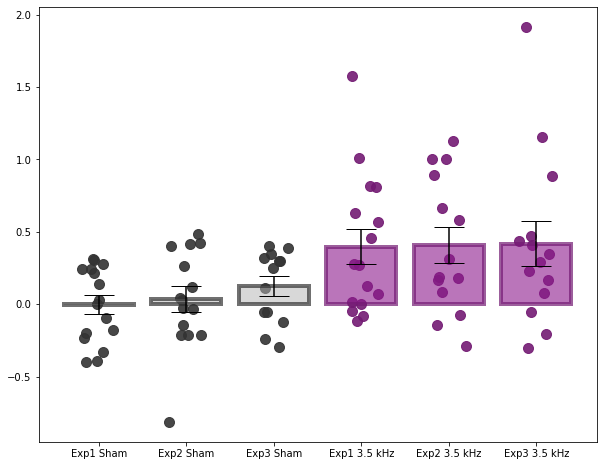

In [47]:
w = 0.8    # bar width
x = [1,2,3,4,5,6] # x-coordinates of your bars


colors = [[.2,.2,.2,.7],[.2,.2,.2,.7],[.2,.2,.2,.7],[.45,.1,.45,.7], [.45,.1,.45,.7], [.45,.1,.45,.7]]   
colors_alpha = [[.7,.7,.7,.5], [.7,.7,.7,.5], [.7,.7,.7,.5],[.55,.1,.55,.6], [.55,.1,.55,.6], [.55,.1,.55,.6]]    
colors_dark = [[.2,.2,.2,.9], [.2,.2,.2,.9], [.2,.2,.2,.9],[.45,.1,.45,.9], [.45,.1,.45,.9],[.45,.1,.45,.9]]    

y = sp_replication

fig, ax = plt.subplots()
ax.bar(x,
       height=[np.mean(yi) for yi in y],
       yerr=[stats.sem(yi) for yi in y],    # error bars
       capsize=15, # error bar cap width in points
       width=w,    # bar width
       tick_label=["Exp1 Sham","Exp2 Sham","Exp3 Sham","Exp1 3.5 kHz", "Exp2 3.5 kHz","Exp3 3.5 kHz"],
       color=colors_alpha,  # face color transparent
       edgecolor=colors,
       linewidth = 4,
       linestyle = '-')

for i in range(len(x)):
    # distribute scatter randomly across whole width of bar
    ax.scatter(x[i] + np.random.random(len(y[i])) * w*.5 - w*.5 / 2, y[i], s = 100,alpha = .9,color=colors_dark[i])

fig.set_size_inches(10,8)

plt.show()

fig.savefig(output_dir / 'kTMP_eLife_Fig4.png', dpi=1000)

In [48]:
# creating a variable with all the different conditions to produce figure 5

sp_exp_all = [np.hstack((list(percent_change_exp1['C_sham'][0].values()),
                  list(percent_change_exp2['C_sham'][0].values()),
                  list(percent_change_exp3['C_sham'].values()))),
              
                  list(percent_change_exp1['C_2000'][0].values()),
              
                  np.hstack((list(percent_change_exp1['C_3500'][0].values()),
                  list(percent_change_exp2['C_3500'][0].values()),
                  list(percent_change_exp3['C_3500'].values()))),
                   
                  list(percent_change_exp1['C_5000'][0].values()),
              
                  list(percent_change_exp3['C_20AM'].values()),
                  list(percent_change_exp2['C_20AM'][0].values()),
                  list(percent_change_exp3['C_140AM'].values()),
                  list(percent_change_exp2['C_140AM'][0].values()),
             
             ]



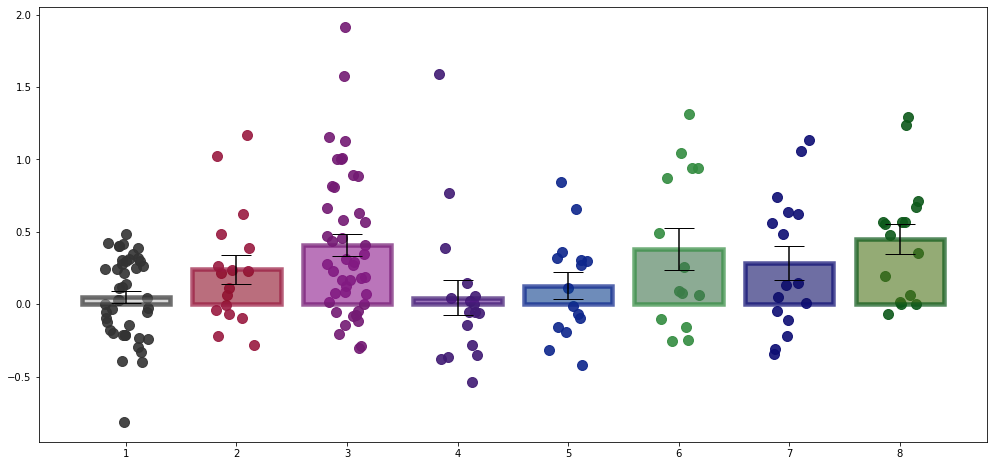

In [49]:
## For SINGLE PULSE DATA
w = 0.8    # bar width
x = [1,2,3,4,5,6,7,8] # x-coordinates of your bars



colors = [[.2,.2,.2,.7],[.60,.1,.25,.7],[.45,.1,.45,.7], [.25,.1,.45,.7],[.05,.15,.55,.7],[.2,.55,.25,.7],[.05,.05,.45,.7],[.05,.35,.1,.7]]    
colors_alpha = [[.7,.7,.7,.5], [.55,.05,.15,.6], [.55,.1,.55,.6], [.35,.1,.55,.6],[.05,.25,.55,.6],[.25,.45,.3,.6], [.05,.05,.4,.6],[.3,.45,.1,.6]]    
colors_dark = [[.2,.2,.2,.9],[.60,.1,.25,.9],[.45,.1,.45,.9],[.25,.1,.45,.9],[.05,.15,.55,.9],[.2,.55,.25,.9],[.05,.05,.45,.9],[.05,.35,.1,.9]]   

y = sp_exp_all

fig, ax = plt.subplots()
ax.bar(x,
       height=[np.mean(yi) for yi in y],
       yerr=[stats.sem(yi) for yi in y],    # error bars
       capsize=15, # error bar cap width in points
       width=w,    # bar width
#        tick_label=["Exp1 Sham","Exp2 Sham","Exp3 Sham","Exp1 3.5 kHz", "Exp2 3.5 kHz","Exp3 3.5 kHz"],
       color=colors_alpha,  # face color transparent
       edgecolor=colors,
       linewidth = 4.5,
       linestyle = '-')


for i in range(len(x)):
    # distribute scatter randomly across whole width of bar
    ax.scatter(x[i] + np.random.random(len(y[i])) * w*.5 - w*.5 / 2, y[i], s = 100,alpha = .9,color=colors_dark[i])

fig.set_size_inches(17,8)

plt.show()


fig.savefig(output_dir / 'kTMP_eLife_Fig5.png', dpi=1000)


